In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from PIL import Image
import os
import gradio as gr
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing the important libraries for Transforming image labels
from sklearn.preprocessing import LabelBinarizer
import pickle

# Importing backend from keras
from keras import backend as K
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.convolutional import MaxPooling2D

# Importing formating tools
from termcolor import colored

## creating a variable to print the guide to the notebook functionality after all the files are installed
welcomer = "WELCOME!"
welcome = welcomer.replace("WELCOME!", colored("WELCOME!", "green", attrs=["bold"]))
starter = "This is the Plant Disease Predictor Data Science proud project by Marveriks"
start = starter.replace("Marveriks", colored("Marveriks", "green", attrs=["bold"]))
guide = "If you dont already have the data locally, Please *UNCOMMENT* and run the 3rd and 4th cells to get the Data. "
info = "It might take a while to get the data after you run"
intro = "Run the cells consecutively without jumping foward to avoid unecessary *ERRORS*"
text = "Made with Love by Marveriks"
end = colored("Made", "green", attrs=["bold"]) + " " + \
                 colored("with", "yellow", attrs=["bold"]) + " " + \
                 colored("Love", "red", attrs=["bold"]) + " " + \
                 colored("by", "yellow", attrs=["bold"]) + " " + \
                 colored("Marveriks", "green", attrs=["bold"])

# Generating the guide
print(welcome)
print(".......................................................")
print(start)
print(".......................................................")
print(guide)
print(info)
print(intro)
print()
print()
print(end)

WELCOME!
.......................................................
This is the Plant Disease Predictor Data Science proud project by Marveriks
.......................................................
If you dont already have the data locally, Please *UNCOMMENT* and run the 3rd and 4th cells to get the Data. 
It might take a while to get the data after you run
Run the cells consecutively without jumping foward to avoid unecessary *ERRORS*


Made with Love by Marveriks


In [2]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [3]:
# installing and importing the opendatasets so as to use it retrieve datasets from kaggle
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od

In [4]:
# # Downloading the data from kaggle
# kaggle_link = 'https://www.kaggle.com/datasets/emmarex/plantdisease'
# od.download(kaggle_link, force=True)

In [5]:
# function used converting images to an array
def imgarray(img_dir):
    try:
        image = cv2.imread(img_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return imgarray(image)
        else :
            return np.array([])
    except Exception as e:
        print(e)
        return None

In [6]:
## In this cell I will be declaring the dataset directory path denoted by "data_dir"
data_dir = "./plantdisease"

In [7]:
image_list = []
label_list = []

try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(data_dir)

    for plant_folder in root_dir:
        if plant_folder == ".DS_Store":
            continue

        plant_disease_folder_list = os.listdir(os.path.join(data_dir, plant_folder))

        for disease_folder in plant_disease_folder_list:
            if disease_folder == ".DS_Store":
                continue

            print(f"[INFO] Processing {disease_folder} ...")
            plant_disease_image_list = os.listdir(os.path.join(data_dir, plant_folder, disease_folder))

            for image in plant_disease_image_list[:200]:
                if image == ".DS_Store":
                    continue

                image_directory = os.path.join(data_dir, plant_folder, disease_folder, image)
                if image_directory.endswith((".jpg", ".JPG")):
                    try:
                        img = Image.open(image_directory)
                        image_list.append(img)
                        label_list.append(disease_folder)
                        print(f"[INFO] Image loaded: {image_directory}")
                    except Exception as e:
                        print(f"Error loading image: {image_directory} - {e}")

    print("[INFO] Image loading completed")

except Exception as e:
    print(f"Error: {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\01940b6d-7dea-4889-

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\17557939-f9e2-435a-a4e7-f4d3cff8aa8b___JR_B.Spot 3107.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\176a9f0a-b815-4e4d-88d4-0960610f723b___NREC_B.Spot 1820.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\17737361-6967-452a-ac5d-efebaa1d8a35___NREC_B.Spot 9127.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\177e323a-7c1d-41f2-a6b3-8ea30795054f___JR_B.Spot 8941.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\178e960f-3250-4378-9783-765b65e54217___NREC_B.Spot 1881.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\179067a6-1012-4a23-8f09-e413300e9f32___NREC_B.Spot 9085.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\17c4557b-7a8f-4ded-b11c-6c5ba3532f37___JR_B.Spot 8824.JPG
[INFO] Image loaded: ./plantdisea

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2becae93-578d-44c6-8e74-056e59d15c8e___JR_B.Spot 3396.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c13c040-2ce6-47c5-899c-8146cd774f79___NREC_B.Spot 1976.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c4a898a-9812-423b-bd8a-419a09699270___JR_B.Spot 8853.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c8e565d-14be-4cbe-8873-2aa25a86b98c___JR_B.Spot 8903.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2ca511f9-951d-4f34-89af-25fd1a609584___NREC_B.Spot 9138.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2cdea224-6f10-4a3d-a3f1-1debd1a42640___JR_B.Spot 8926.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2d553272-2101-4d56-9819-9f08de938418___NREC_B.Spot 9087.JPG
[INFO] Image loaded: ./plantdisease

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\075e9bdc-4921-440b-948d-83f30151317c___JR_HL 7958.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0760194c-efdd-4065-babb-a12f3b7881a6___JR_HL 7591.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\07aae897-44cd-4a0c-9471-1bd6234135b0___JR_HL 8745.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\07eda9a1-8f8a-471b-b3c6-9093c3d6ca90___JR_HL 8177.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\07f381f7-bc63-4e41-8bcc-6c5954a14c03___JR_HL 8326.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\08203033-de6c-41fc-b5d2-ea5d3ac9da4f___JR_HL 5854.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\084a1485-7006-4277-bd4f-5b9e766cfd24___JR_HL 7892.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\08881481-53d5-412c-8d65-13c4edc6e3c1___JR_HL 8

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1bd09026-a26c-46be-b5ec-850a287c6cb5___JR_HL 5972.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1be321d5-d2cc-4945-b2f3-a36c41160838___JR_HL 7596.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1bf8d046-2b1c-44bf-9a00-9f16e0971d2a___JR_HL 8281.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1bfa8779-be94-4f16-9668-08c91f9ce3d6___JR_HL 8358.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1bfbdcd9-68ae-4676-9693-5f02fd310860___JR_HL 8715.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1c043016-2d55-444d-a379-4a2aafc41a32___JR_HL 7909.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1c159479-4972-41d3-a6ff-fbdb648d72c2___JR_HL 7575.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1c2515f2-c0a7-455e-bc5d-649037cb6e3e___JR_HL 7

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\0fd22207-cb37-42a1-965f-7dfe43f9d579___RS_Early.B 6876.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1082eee1-189d-4e0f-96b5-8b1393be4c4c___RS_Early.B 8743.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\109730cd-03f3-4139-a464-5f9151483e8c___RS_Early.B 6738.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\10a3920b-dd04-406d-8bbd-f92f221e4dee___RS_Early.B 7035.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\10c438df-8ed7-4de7-94df-83298ebcf373___RS_Early.B 7001.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1131b92e-ef46-441e-ac5f-c18ac09bf69a___RS_Early.B 8064.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1132bee0-fe6b-41a9-

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2cce6cd6-16c4-426f-84e6-2f3c192fac2c___RS_Early.B 8999.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2ce7e8d7-4cc9-4ab3-9d22-8f7ad21d8eda___RS_Early.B 8609.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2cf993b6-98e7-4678-aea5-9177ea3b63bd___RS_Early.B 7692.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2d149f7a-4b0a-40a6-8d0b-1d1f14e5e696___RS_Early.B 9143.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2d344be7-2d5f-4d27-aeb2-b92c8191b877___RS_Early.B 7173.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2dc9baab-663f-4f09-a0a4-7c07edfb4c42___RS_Early.B 6866.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2e88d4ed-b11b-4123-9e4b-f3c02a65ad39___RS_Early.B 9180.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\2ebb14eb-0e87-468c-

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\54f86311-9d76-421b-b401-0b02f6e738a5___RS_HL 4172.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\56ae1281-5ee5-4f2a-8678-c2e4491878c6___RS_HL 1869.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\57c2663b-5d1d-4476-b067-38b2149c3b2d___RS_HL 1796.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\57e24d88-fd01-4422-b8b5-d688d2296184___RS_HL 5401.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\57e262fc-e0ba-44db-a967-5ba6f1826e49___RS_HL 1897.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\58a98860-86d8-41e7-9f8c-cc2ca5e90012___RS_HL 1758.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\5a3fc4bb-a78c-4276-8934-f0b037ffb860___RS_HL 5412.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\5cb360dd-5c17-4c57-b31d-97cd8dd8d0bd___RS_HL 1797.JPG
[INFO] Image loaded: ./plantdisease\Plan

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\d325e580-5faa-4aea-927d-2700f52cc343___RS_HL 1872.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\d340704d-cc00-4068-bb8a-ae70840b7bfa___RS_HL 1773.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\d50a580b-46bd-47f5-a0bf-8535da774104___RS_HL 5408.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\dbe4f332-9189-4b76-b30c-f0c9a55e48d3___RS_HL 1841.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\dca8ac5c-b925-435a-a5e9-da09fa8938a1___RS_HL 4182.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\de9a8669-d437-40f0-aa56-fe2d8276a1e0___RS_HL 1910.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\e1b49d1b-165b-4f4e-8a30-735e62bc39c5___RS_HL 1839.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\e34e563f-7a4a-4b44-bdf2-b6f96cbcd929___RS_HL 5370.JPG
[INFO] Image loaded: ./plantdisease\Plan

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\09fa42e4-1736-494e-8c46-50c6900586d6___RS_LB 5212.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0acdc2b2-0dde-4073-8542-6fca275ab974___RS_LB 4857.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0b092cda-db8c-489d-8c46-23ac3835310d___RS_LB 4480.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0b2bdc8e-90fd-4bb4-bedb-485502fe8a96___RS_LB 4906.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0c2628d4-8d64-48a9-a157-19a9c902e304___RS_LB 4590.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0c83302d-4233-4e98-8ecf-755a970495bb___RS_LB 4904.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0d8346e1-4624-4979-84e6-1353ca59007a___RS_LB 4079.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0e068694-63b7-4edf-a93d-f2e9f28efaa6___RS_LB 3923.JPG
[INFO] I

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\227f2f04-4d59-48d9-958d-5cccc70d3f2b___RS_LB 2772.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\22b19227-ae7e-495e-9fe0-d286fbcf9412___RS_LB 3996.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\22bd2a18-a4ba-4c9a-a4d3-2dabc295ccbc___RS_LB 4759.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\22d5cf8c-308f-417d-9b05-b00a0791ecef___RS_LB 4797.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2377f6d5-3660-4b5a-b5b3-eea448e7a143___RS_LB 2729.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\23ad201a-469e-4687-9321-7329bf747992___RS_LB 4990.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\23e2a413-2191-4a94-a305-c12b4ed24aa3___RS_LB 2555.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2425fba0-8d06-4f05-9d0c-258c39777a37___RS_LB 4915.JPG
[INFO] I

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacteria

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0bd31a6a-b084-48c0-b379-3062bde11162___GCREC_Bact.Sp 2974.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c09c121-e945-4b7e-acbf-dff4e0d01acb___GCREC_Bact.Sp 3379.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c2ee2f1-e725-4031-96ea-57e3b8b626b3___GCREC_Bact.Sp 5645.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c32d6d5-bf5b-4904-8108-d7a901f2cb6b___UF.GRC_BS_Lab Leaf 8662.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c5eb8e4-e0fb-424a-8873-e43f9a6121ef___GCREC_Bact.Sp 6281.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c883752-3334-4615-841d-287d58ecf60d___GCREC_Bact.Sp 6119.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c9b7dd9-a0c7-4b6e-bb4d-b2e3cab833d0___GCREC_Bact.Sp 6081.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacteria

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\177b8ce1-d77a-41d7-93ac-852d37d69faa___GCREC_Bact.Sp 3390.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\17bcc3fa-9905-4fcf-938b-c5e63e214718___GCREC_Bact.Sp 6329.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\17ee90d7-f733-4026-a83e-c5c87ad88e67___GCREC_Bact.Sp 5623.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\180f9ef5-6709-4660-8444-617bf357106a___GCREC_Bact.Sp 5726.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\1838f883-5e4b-4b24-bf4b-77d4a82f5f46___GCREC_Bact.Sp 6335.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\18a58445-cf57-41cd-93f8-ebb9d5f66118___GCREC_Bact.Sp 6200.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\18ac424a-de74-40f4-b830-74384ae67302___GCREC_Bact.Sp 3480.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\18ec9a60-a4e3-4dd7-805f-fe9eaf526c2f___RS_Erly.B 8405.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1941f5d9-f31f-453e-b07c-3f90da6aa381___RS_Erly.B 8238.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\19427ace-5a24-4e30-8a4d-228ab4a3b99b___RS_Erly.B 7403.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\197fa869-c124-436e-b3cd-bced95f52a8e___RS_Erly.B 7834.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1a8bd88f-309f-4392-b387-7cb423ef0ab6___RS_Erly.B 7366.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1b4a2ad5-057d-4fac-9188-648edbe49751___RS_Erly.B 7767.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1ba88993-c3f8-462d-bd1b-e10819b9c96f___RS_Erly.B 8396.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1ba9a636-a673-45bc-b515-4fe6848f271e___RS_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\014b5e19-7917-4d76-b632-b5dd31d999ec___RS_HL 9640.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0172e56c-8bb8-4e75-8ac7-509df81393e8___RS_HL 0580.JPG
[INFO] Image loaded: ./plantdisease\PlantVil

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d3691ab-5413-4313-870e-9e5d2faf33ea___RS_HL 9958.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d515778-61ef-4f0b-ab54-75607c80220f___RS_HL 9745.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d615a38-cfa4-45e4-b1b4-9977220e19ca___RS_HL 9815.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d70d565-520e-474c-85c1-ab478c9f1d4b___GH_HL Leaf 203.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d789240-9714-4378-8b63-4afb12ddfa44___RS_HL 9735.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d91db63-181b-4c3a-939b-181cc812e466___RS_HL 0308.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0d932b2a-584e-4971-8590-70c5f0a049cf___RS_HL 9739.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0de16216-510d-48c1-9ef0-78ce39328ff2___GH_HL Leaf 240.JPG
[INFO] Image loaded: ./plantdisease\PlantVilla

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1e1aa3d8-d12f-47e1-b316-b8656ab3f2b6___RS_HL 0075.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1e4aef32-09c5-4af8-8948-dc86bd8ef2e7___GH_HL Leaf 215.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1e5e6f9d-6d14-4ea7-9c36-c6a559e567d7___RS_HL 9780.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1e8c2c4d-e787-45ff-87ac-56484ac8d3d4___GH_HL Leaf 472.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1ebf9add-aa7f-4a84-adbf-67f700f918bc___GH_HL Leaf 437.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1f43d81a-6889-4613-a727-f92a75cf9861___RS_HL 0297.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1f763a4e-3f17-44c1-be1b-a8752d2b93a1___RS_HL 9830.JPG
[INFO] Processing Tomato_Late_blight ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 49

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0ab172fa-ac7b-4a3e-90c8-0708703eb3bb___RS_Late.B 5572.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0ab1cab4-a0c9-4323-9a64-cdafa4342a9b___GHLB2 Leaf 8918.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0ab391bd-e5ba-479c-919b-3aa9a94f66db___GHLB2 Leaf 8934.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0ac3df5b-d713-42ef-b0ad-20b5410237ad___RS_Late.B 4969.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0b137624-885b-4d9b-b9e6-330c6681de4b___GHLB2 Leaf 8848.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0b33d7a7-d017-4857-845a-874a004ccd26___RS_Late.B 4970.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0b3c7107-cef9-455e-8fa0-30039b9fc206___RS_Late.B 5038.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0b52ebed-e711-41f2-bfd1-af73410b370e___RS_Late.

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0185befe-f0b5-4848-9677-f33c2237f4e9___Crnl_L.Mold 8729.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\022a4dfb-84cc-45cb-81c5-a620817e31cb___Crnl_L.Mold 6926.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\02415b3d-2ba8-4654-8398-a480ad901bbf___Crnl_L.Mold 8645.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\02a29ab9-8cba-47a0-bc2f-e7af7dbae149___Crnl_L.Mold 7165.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\030ea180-4eb5-4f91-918e-56c7cfe2c001___Crnl_L.Mold 7076.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\036d12b0-1e97-4975-bd80-a8a3c48588e7___Crnl_L.Mold 6

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2715ba21-6d2a-485a-bd10-ea6e8177250d___Crnl_L.Mold 6863.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\272c102c-6c18-4e3a-a64c-078bce56bde1___Crnl_L.Mold 6889.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\273b19fa-2701-4679-a994-8a37040ac343___Crnl_L.Mold 6577.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27867fa8-39ae-4480-936e-1adcdceeb7fb___Crnl_L.Mold 6924.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27c4fc3e-760a-4d3c-8552-bb5ca4eab3d8___Crnl_L.Mold 6781.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27e8bb41-97a2-44b7-95e2-fd3b2e99f317___Crnl_L.Mold 7064.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27fb67df-f3f0-4e27-9fa3-6b7ee21515f1___Crnl_L.Mold 8934.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2847f847-3048-487d-ae4f-c45e44d04d85___Crnl_L.Mold 8

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0025c401-7785-49c5-8bef-780a8a0d3652___Matt.S_CG 2694.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\006c018a-bb21-4a24-b1ff-d8b2864a7354___Matt.S_CG 6192.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\009bb542-f0c0-40f2-98a7-f547c5adec45___Matt.S_CG 1355.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\009ce7ca-77de-4e4e-9f59-bec9162df779___Matt.S_CG 7403.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septor

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\10b13eee-3523-4a86-96cf-5b94191c3f4b___Matt.S_CG 1305.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\10bbb1a5-c5d5-4500-959c-4818a787e5ec___Keller.St_CG 1975.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\110ae57c-f1e0-4a19-be00-4254fa7df22b___Matt.S_CG 1462.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\113d9910-040e-4ae9-9c7d-6eba1d1e86e1___Matt.S_CG 7710.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1142c61e-5959-43fd-8745-fc95bc0b1b5f___JR_Sept.L.S 8378.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\115872f2-53a2-4ed9-a394-01882a0d30db___Keller.St_CG 1914.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\11971add-1e25-4f5c-8a7e-2fa5ae46cfc6___Matt.S_CG 0740.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1e427d73-cd81-4476-9427-4854a10ea894___JR_Sept.L.S 2689.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1e8f411c-7f6b-42c0-8c84-70486b6c91d1___Keller.St_CG 1824.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1ea484d8-6ebf-4d95-81b1-1c7f78e92015___JR_Sept.L.S 8425.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1eb51af9-a622-4f97-a47b-b7474771d414___JR_Sept.L.S 2455.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1ecc0c20-9ef3-40af-a8d8-9a43463a26b4___Matt.S_CG 7654.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1f01e6fc-e4a2-4f40-bd17-bb3852cef631___Keller.St_CG 1825.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1f11a23b-8dd3-4fc8-82cf-235cfcdaf5b2___Matt.S_CG 2783.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_S

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\089621fa-9c68-4401-a964-ee3383a31cd6___Com.G_SpM_FL 8554.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\08ddab1e-8a69-47b2-b0ff-6d53e6315eee___Com.G_SpM_FL 1445.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\08e9a879-8784-4775-aeef-21fbd62dd08e___Com.G_SpM_FL 8513.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\08f0fd0e-d4b1-400d-9df1-2d61d24c95f0___Com.G_SpM_FL 9397.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\093aecee-3211-4aad-8f09-45ccdc92eeb6___Com.G_SpM_FL 9040.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\09434fa9-0733-4ef5-9cc3-db29d1e3a480___Com.G_SpM_FL 1425.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\11ba6d63-4c6e-4a3f-acd9-18567bab6ab9___Com.G_SpM_FL 1728.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\11c54a04-20e8-439c-b520-2d5a3c18d12b___Com.G_SpM_FL 8875.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\12019ba6-405d-45b7-b0e6-5a6a665de0e7___Com.G_SpM_FL 8624.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\12166ab1-12f0-4480-8734-87f8164aa178___Com.G_SpM_FL 8951.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\123223d5-ec90-4df4-8a65-e474c88fda19___Com.G_SpM_FL 1664.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\125b13a4-60c6-4334-bee9-a92114a7252d___Com.G_SpM_FL 9590.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\007ec913-8cfe-43ed-b458-f041a17266ae___Com.G_TgS_FL 9844.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0197df47-a9cb-4b6c-b7

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12043f51-8708-4543-ae7b-1a4e97376ade___Com.G_TgS_FL 8244.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\1220c0aa-f6e0-4b7d-ab11-44e73b0b10f4___Com.G_TgS_FL 9863.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\122577a3-0f69-45f0-9e73-48528f9dea1c___Com.G_TgS_FL 8179.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\124f6318-c33b-4344-babd-d8f16be507c1___Com.G_TgS_FL 0857.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12c492b4-fb79-47c4-9bdd-720c1361a355___Com.G_TgS_FL 8224.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12d24a09-d4e7-419c-8a19-b0efa059c3ec___Com.G_TgS_FL 1020.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\13171789-e847-42d1-ac9b-cfeecb94bf82___Com.G_TgS_FL 1038.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\1321a438-2e26-42d0-81

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\26150f8e-52df-4b1e-b37c-01f3cfc8d746___Com.G_TgS_FL 9958.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\2615bf45-0d9a-4b11-8eab-25bb5b86937d___Com.G_TgS_FL 1053.JPG
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\00c07a77-15e6-4815-92d4-8d1e1afb7f3c___PSU_CG 2052.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\01b32f27-2b9b-4961-805b-8066bf4d90f1___PSU_CG 2417.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\021accd9-bbb2-4777-8f94-93295e6de49e___PSU_CG 2075.JPG
[INFO] Image loaded: ./plantdi

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\49a98ba1-a1b1-4d4b-85af-29aa6648fc64___PSU_CG 2292.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\4a76c13f-3e28-4849-81ef-4cdd6cdcccf4___PSU_CG 2171.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\4ab5b752-6622-42f2-8743-fa9c9b03e137___PSU_CG 2120.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\4ab92098-cb26-40ef-b145-fbd1cdde9bd5___PSU_CG 2392.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\4c518a8d-6ecc-45c2-b14c-f610a400c950___PSU_CG 2370.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\4e35d3db-e33d-493d-80f2-6a3fdce77959___PSU_CG 2135.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\503c6a57-2af3-48ed-b96f-e2cbf6fb5dd1___PSU_CG 2263.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\00139ae8-d881-4edb-925f-46584b0bd68c___YLCV_NREC 2944.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0036c89d-7743-4895-9fcf-b8d2c1fc8455___YLCV_NREC 0313.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\003bce78-28c9-4612-b148-f621e9a23bd4___YLCV_GCREC 5154.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\004273e3-e283-4ec6-b597-d0de1bfbc590___YLCV_GCREC 2434.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\00576ef6-6fa0-40d2-b365-87850597bafd___UF.GRC_YLCV_Lab 01999.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0068fe04-aa0c-4d92-8af0-f05c9d8db6eb___UF.GRC_YLCV_Lab 01755.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\006c18c6-2486-412b-8113-956

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0563dce6-95ce-4ce1-a2b7-95f923b09d26___UF.GRC_YLCV_Lab 01993.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\056ed8b8-6220-426a-8bd4-ed25441a5543___UF.GRC_YLCV_Lab 02102.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\056f00b8-a57e-4bd0-92ad-ace32528bae2___UF.GRC_YLCV_Lab 02521.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\057552a8-8c38-443f-b523-5ee2b428e622___UF.GRC_YLCV_Lab 09477.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\057bc3cc-7742-4aea-a79c-e1f3d5b7e7ee___UF.GRC_YLCV_Lab 02000.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0596712d-eb13-43b5-bd6b-2bef0c35dbe2___YLCV_GCREC 5198.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\059cfdd

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\095dc511-bc42-4abe-ab82-2e3aaa6507f8___YLCV_GCREC 5283.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09621d88-f15b-444a-880d-7b6d7db788ab___UF.GRC_YLCV_Lab 02604.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\096d9dfc-a9ed-4a11-ba47-d882d9c39109___UF.GRC_YLCV_Lab 02920.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\098efb67-21d9-4884-9f01-62608d340a1b___YLCV_GCREC 5234.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\099b0332-14bf-4866-8c3b-e753e7e62105___YLCV_NREC 2398.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09b3387c-2054-4155-813a-ce66c3116286___YLCV_NREC 2916.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09b590da-39d7-43fc-8bf8-1d2

In [8]:
len(image_list)

2952

In [9]:
len(label_list)

2952

In [10]:
## Transforming image Labels using scikit learn (labelBinarizer)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [11]:
# the code below is to show the number of classes of the labels binarized
print(n_classes)

15


In [12]:
# printing the labels binarized
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [13]:
## Making sure that the path I want to use is correct

pepper_dir = "plantdisease/PlantVillage/Pepper__bell___Bacterial_spot"
if os.path.exists(pepper_dir):
    DATA_PATH = os.listdir(pepper_dir)
    success = "The Path You Provided is Valid. \033[1m\033[92mSuccess Group 4\033[0m"
    print(success)

    # Rest of the code for plotting the images
else:
    error = "Directory not found. \033[1m\033[91mYou are bright but input the right path\033[0m"
    print(error)

The Path You Provided is Valid. Success Group 4


In [14]:
## Function to plot images

def plot_images_in_rows(image_dir, data_path, items_per_row):
    plt.figure(figsize=(15, 10))
    count = 0

    for i in range(3):
        plt.subplot(items_per_row, items_per_row, count + 1)
        plant_img = plt.imread(os.path.join(image_dir, data_path[i]))
        plt.imshow(plant_img, cmap='gray')
        plt.axis('off')
        plt.title(title)
        count += 1


        if count % items_per_row == 0:
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(15, 10))

    if count % items_per_row != 0:
        plt.tight_layout()
        plt.show()

Sample images of pepper bell Bacterial Spot 


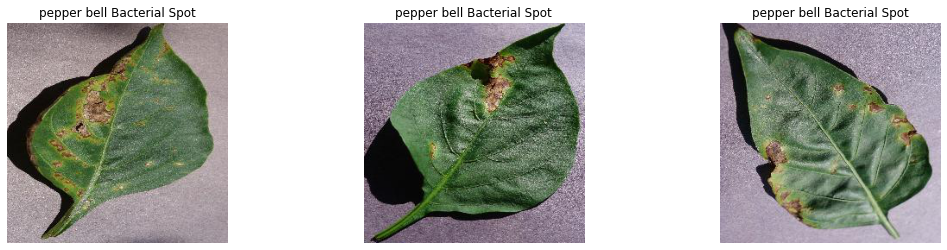

<Figure size 1080x720 with 0 Axes>

In [15]:
pepper_dir = "plantdisease/PlantVillage/Pepper__bell___Bacterial_spot"
pepper_path = os.listdir("plantdisease/PlantVillage/Pepper__bell___Bacterial_spot")
items_per_row = 3
title = "pepper bell Bacterial Spot"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(pepper_dir, pepper_path, items_per_row)


Sample images of Tomato Bacterial spot 


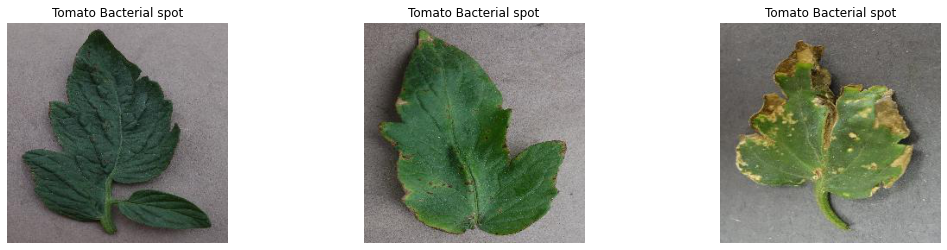

<Figure size 1080x720 with 0 Axes>

In [16]:
tomato_dir = "plantdisease/PlantVillage/Tomato_Bacterial_spot"
tomato_path = os.listdir("plantdisease/PlantVillage/Tomato_Bacterial_spot")
items_per_row = 3
title = "Tomato Bacterial spot"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(tomato_dir, tomato_path, items_per_row)

Sample images of Potato Late blight 


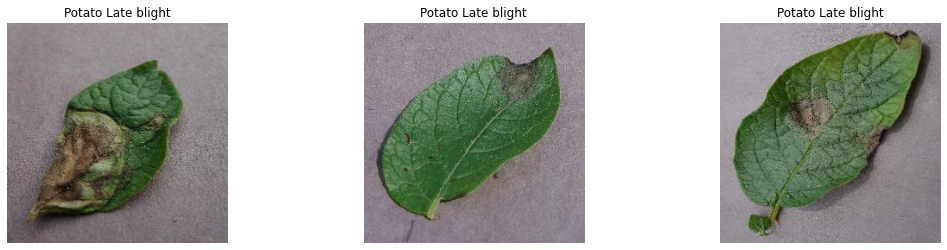

<Figure size 1080x720 with 0 Axes>

In [17]:
potato_dir = "plantdisease/PlantVillage/Potato___Late_blight"
potato_path = os.listdir("plantdisease/PlantVillage/Potato___Late_blight")
items_per_row = 3
title = "Potato Late blight"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(potato_dir, potato_path, items_per_row)

In [18]:
import random

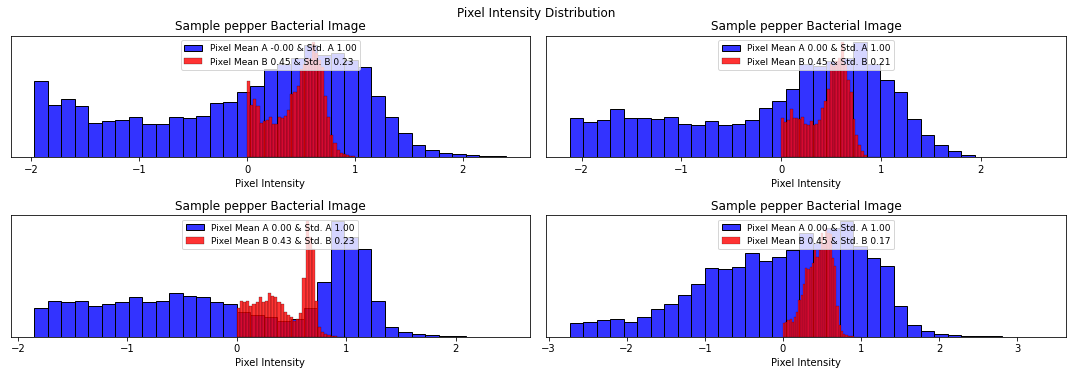

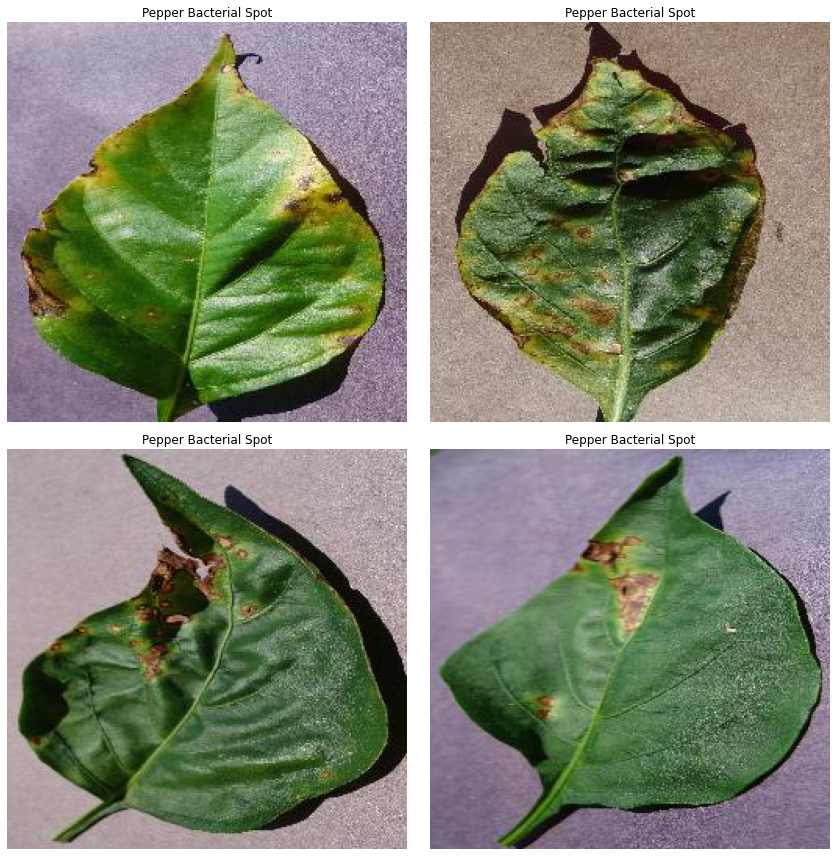

In [19]:
train_normal = os.listdir('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot')
labels = ['pepper']

train_im_n_selected = random.sample(train_normal, 4)


fig = plt.figure(figsize=(15, 15))
count = 1
valid_files = []

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot', img)
    if os.path.isfile(sample_path):
        valid_files.append(img)
        sample_img = Image.open(sample_path)
        sample_img = np.array(sample_img)
        sample_img = sample_img / 255.0
        sample_img_mean = np.mean(sample_img)
        sample_img_std = np.std(sample_img)
        new_sample_img = (sample_img - sample_img_mean) / sample_img_std
        ax = fig.add_subplot(6, 2, count, yticks=[])
        sns.histplot(new_sample_img.ravel(),
                     label=f'Pixel Mean A {np.mean(new_sample_img):.2f} & Std. A {np.std(new_sample_img):.2f}',
                     kde=False, color='blue', bins=35, alpha=0.8)
        sns.histplot(sample_img.ravel(),
                     label=f'Pixel Mean B {np.mean(sample_img):.2f} & Std. B {np.std(sample_img):.2f}',
                     kde=False, color='red', bins=35, alpha=0.8)
        plt.legend(loc='upper center', fontsize=9)
        plt.title("Sample pepper Bacterial Image")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('# Pixels in Image')
        count += 1
    else:
        print(f"File not found: {sample_path}")

fig.suptitle('Pixel Intensity Distribution')
plt.tight_layout()
plt.show()

train_im_n_selected = valid_files

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot', img)
    sample_img = Image.open(sample_path)
    sample_img = np.array(sample_img)

    # Display the image in the corresponding subplot
    axes[i].imshow(sample_img, cmap='gray')
    axes[i].set_title('Pepper Bacterial Spot')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [20]:
# converting the list of images to a numpy array
image_array = []

for img_file in image_list:
    # Extract the pixel data from the JpegImageFile object
    img_data = np.array(img_file, dtype=np.float16)
    # Normalize the pixel values
    img_data = img_data / 225.0
    # Append the image data to the image_array
    image_array.append(img_data)

# Convert the image_array to a NumPy array
img_np_array = np.array(image_array)

In [21]:
# confirming the datatype of our image array
type(img_np_array)

numpy.ndarray

In [22]:
# splitting our data into the test and training set
print("...Spliting data to train and test sets...")
x_train, x_test, y_train, y_test = train_test_split(img_np_array, image_labels, test_size=0.2, random_state = 42) 

...Spliting data to train and test sets...


In [23]:
# setting and declaring the data augmentation parameters
aug = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode="nearest")

In [24]:
inputShape = (height, width, depth)

In [25]:
# CNN
# Training the model
# Initialize model and proceed by adding layers (Convolution, Normalization, Max Pooling, Dense) with 'relu' as the preferred activation function
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=inputShape))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=n_classes, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [27]:
# importing Adam optimization algorithm
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# train the network
print("[...training the network...")

[...training the network...


In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

In [29]:

#fitting the model
history = model.fit(aug.flow(x_train, y_train, batch_size = BS), 
                    epochs = EPOCHS,
                    validation_data = aug.flow(x_test, y_test),
                    callbacks = learning_rate_reduction)

Epoch 1/25
74/74 [==============================] - 601s 8s/step - loss: 0.5097 - accuracy: 0.2757 - val_loss: 0.3827 - val_accuracy: 0.0643
Epoch 2/25
74/74 [==============================] - 638s 9s/step - loss: 0.2477 - accuracy: 0.4257 - val_loss: 1.1119 - val_accuracy: 0.0914
Epoch 3/25
74/74 [==============================] - 607s 8s/step - loss: 0.2030 - accuracy: 0.5028 - val_loss: 1.3595 - val_accuracy: 0.0761
Epoch 4/25
74/74 [==============================] - 526s 7s/step - loss: 0.1718 - accuracy: 0.5680 - val_loss: 0.5461 - val_accuracy: 0.1049
Epoch 5/25
74/74 [==============================] - 593s 8s/step - loss: 0.1538 - accuracy: 0.5981 - val_loss: 0.4832 - val_accuracy: 0.1760
Epoch 6/25
74/74 [==============================] - 587s 8s/step - loss: 0.1388 - accuracy: 0.6379 - val_loss: 0.8821 - val_accuracy: 0.1218
Epoch 7/25
74/74 [==============================] - 588s 8s/step - loss: 0.1282 - accuracy: 0.6768 - val_loss: 0.3536 - val_accuracy: 0.2876
Epoch 8/25
74

In [30]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

19/19 [==============================] - 10s 538ms/step - loss: 0.1582 - accuracy: 0.7699
Loss of the model is -  0.15816698968410492
19/19 [==============================] - 11s 569ms/step - loss: 0.1582 - accuracy: 0.7699
Accuracy of the model is -  76.9881546497345 %


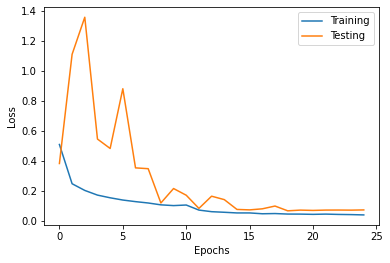

In [31]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()

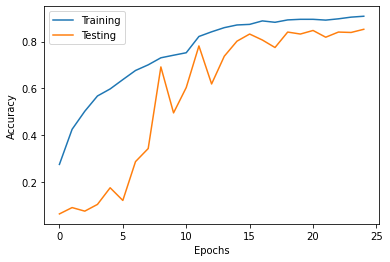

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()


In [33]:
model.save_weights('PlantDiseasePredictor')


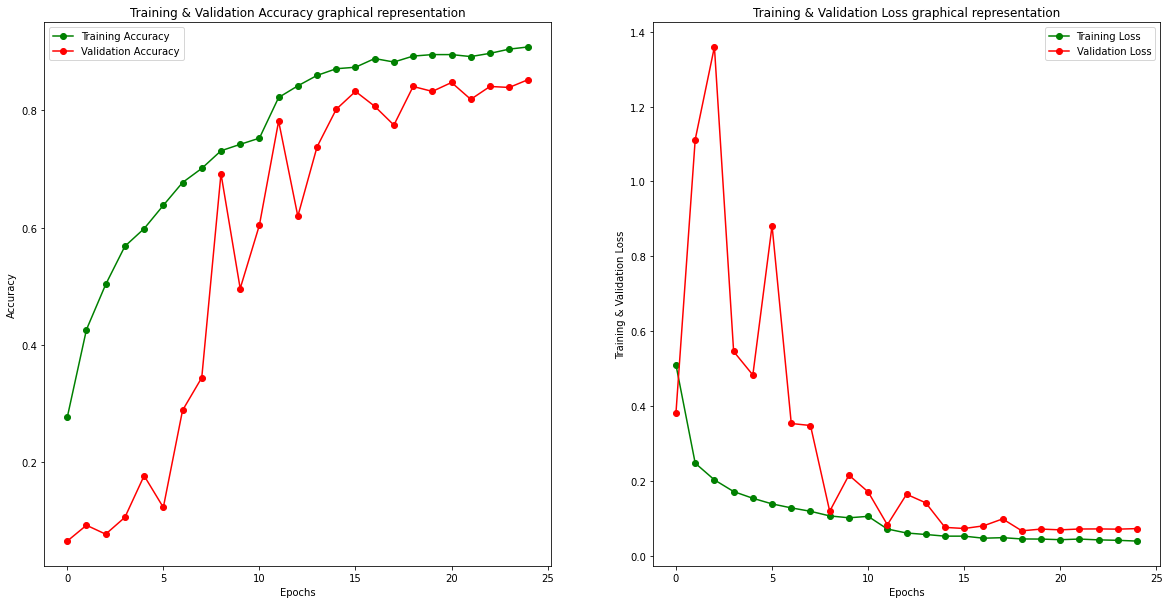

In [35]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy graphical representation')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss graphical representation')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


In [36]:
predictions = model.predict(x_test)
len(predictions)

591

In [37]:
labels = label_binarizer.classes_
labels

array(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype='<U43')

In [38]:
len(y_test)

591

In [39]:
print(y_test.shape, predictions.shape)


(591, 15) (591, 15)


In [41]:
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)

In [43]:
target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

print(classification_report(y_test,
                           predictions,
                           target_names = target_names))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.67      0.80        45
                     Pepper__bell___healthy       0.95      0.93      0.94        40
                      Potato___Early_blight       0.78      1.00      0.88        54
                       Potato___Late_blight       0.88      0.67      0.76        43
                           Potato___healthy       0.92      0.60      0.73        20
                      Tomato_Bacterial_spot       0.89      0.86      0.88        37
                        Tomato_Early_blight       0.95      0.46      0.62        41
                         Tomato_Late_blight       1.00      0.37      0.54        35
                           Tomato_Leaf_Mold       0.97      0.76      0.85        38
                  Tomato_Septoria_leaf_spot       0.68      0.52      0.59        33
Tomato_Spider_mites_Two_spotted_spider_mite       0.67      0.67

C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, predictions)
for i in range(len(mcm)):
    print(f"Confusion matrix for class {i}:")
    print(mcm[i])
    print()

Confusion matrix for class 0:
[[546   0]
 [ 15  30]]

Confusion matrix for class 1:
[[549   2]
 [  3  37]]

Confusion matrix for class 2:
[[522  15]
 [  0  54]]

Confusion matrix for class 3:
[[544   4]
 [ 14  29]]

Confusion matrix for class 4:
[[570   1]
 [  8  12]]

Confusion matrix for class 5:
[[550   4]
 [  5  32]]

Confusion matrix for class 6:
[[549   1]
 [ 22  19]]

Confusion matrix for class 7:
[[556   0]
 [ 22  13]]

Confusion matrix for class 8:
[[552   1]
 [  9  29]]

Confusion matrix for class 9:
[[550   8]
 [ 16  17]]

Confusion matrix for class 10:
[[543  12]
 [ 12  24]]

Confusion matrix for class 11:
[[540   0]
 [ 40  11]]

Confusion matrix for class 12:
[[558   1]
 [  7  25]]

Confusion matrix for class 13:
[[552   0]
 [ 17  22]]

Confusion matrix for class 14:
[[513  31]
 [  0  47]]



In [47]:
## combining the confusion matrices into a single one
mcm = multilabel_confusion_matrix(y_test, predictions)
overall_cm = np.sum(mcm, axis=0)

print("Overall Confusion Matrix:")
print(overall_cm)

Overall Confusion Matrix:
[[8194   80]
 [ 190  401]]


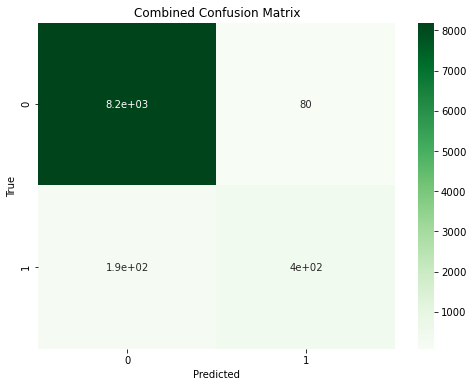

In [52]:
mcm = multilabel_confusion_matrix(y_test, predictions)
overall_cm = np.sum(mcm, axis=0)

labels = ['0', '1']  # Replace with your desired labels

plt.figure(figsize=(8, 6))
sns.heatmap(overall_cm, cmap='Greens', annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Combined Confusion Matrix')
plt.show()

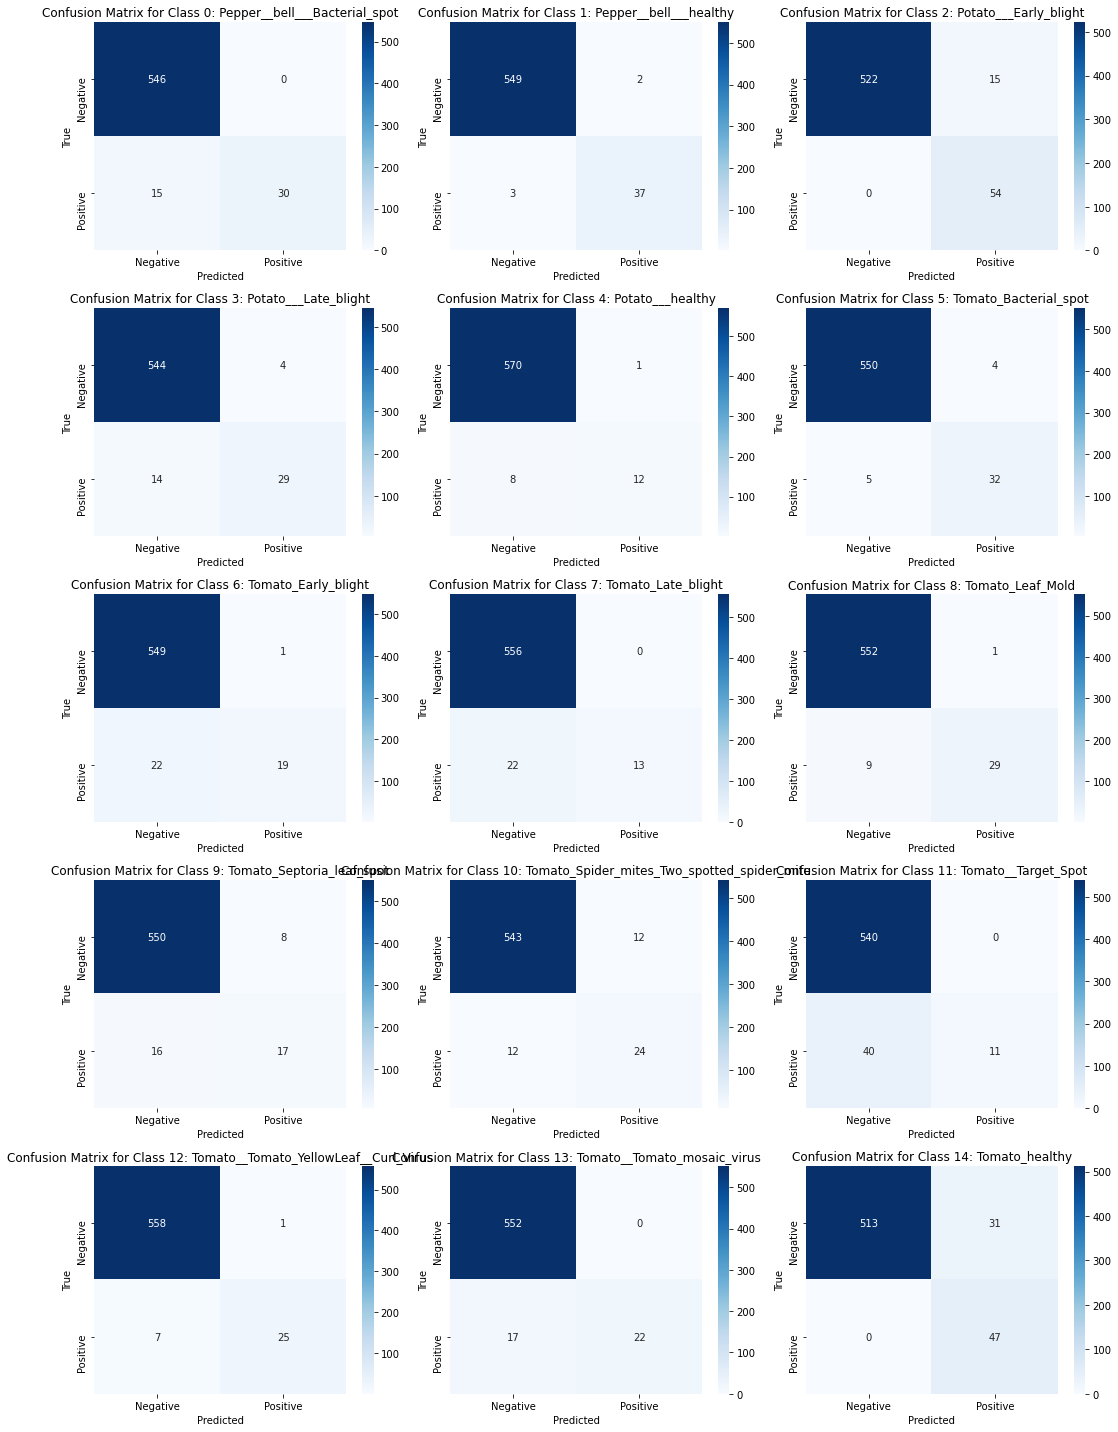

In [55]:
## confusion matrix for each set of class

mcm = multilabel_confusion_matrix(y_test, predictions)
labels = target_names  # Replace with your desired class labels

num_classes = len(mcm)
num_plots_per_row = 3
num_rows = (num_classes + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))

for i, ax in enumerate(axes.flatten()):
    if i < num_classes:
        sns.heatmap(mcm[i], cmap='Blues', annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(f'Confusion Matrix for Class {i}: {labels[i]}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [56]:
def plantdiseaseprediction(img):
    img = np.array(img)/255
    img = img.reshape(-1, 256, 256, 1)
    isUnhealthy = model.predict(img)[0]
    imgClass = "Healthy" if isPUnhealthy < 0.5 else "Affected"
    return imgClass

In [61]:
 
pr = model.predict(x_test)
pr = np.where(pr > 0.5, 1, 0)
for i in range(len(pr)):
    if np.greater(pr[i], 0.5).any():
        pr[i] = 1
    else:
        pr[i] = 0


In [62]:
import gradio as gr

In [63]:
img = gr.inputs.Image(shape = (256, 256))
label = gr.outputs.Label(num_top_classes = 1)

C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [ ]:
##

In [ ]:
# from sklearn.metrics import classification_report

# aug.fit(x_train)

# # Generate predictions on the augmented test set
# augmented_x_test = aug.flow(x_test, batch_size=len(x_test), shuffle=False)
# predictions = model.predict(augmented_x_test)

# # Convert raw predictions to binary labels
# predictions = (predictions > 0.5).astype(int)

# # Evaluate the model's performance
# report = classification_report(y_test, predictions)
# print(report)

In [ ]:
# from sklearn.metrics import classification_report

# aug.fit(x_train, y_train)

# # Generate predictions on the test set
# predictions = clf.predict(x_test)

# # Convert predictions to a numpy array and flatten it
# predictions = np.array(predictions)
# predictions = predictions.flatten()

# # Evaluate the model's performance
# report = classification_report(y_test, predictions)
# print(report)

In [ ]:

# sn = len(y_test)  # Get the length of y_test
# predictions = np.array(predictions)
# random_predictions = np.random.choice(predictions, size=sn)



In [ ]:

# # Generate random predictions
# sn = len(y_test)  # Get the length of y_test
# random_predictions = np.random.choice(predictions, size=len(y_test))

# target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
#                 'Potato___Early_blight', 'Potato___Late_blight',
#                 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
#                 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
#                 'Tomato_Septoria_leaf_spot',
#                 'Tomato_Spider_mites_Two_spotted_spider_mite',
#                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
#                 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# # Evaluate the model's performance
# report = classification_report(y_test, random_predictions, target_names=target_names)
# print(report)


In [ ]:

# target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
#                 'Potato___Early_blight', 'Potato___Late_blight',
#                 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
#                 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
#                 'Tomato_Septoria_leaf_spot',
#                 'Tomato_Spider_mites_Two_spotted_spider_mite',
#                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
#                 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# # Evaluate the model's performance
# report = classification_report(y_test, predictions, target_names=target_names)
# print(report)

In [ ]:
# cm = confusion_matrix(y_test, predictions)
# cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
# cm
